In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gammainc, gamma
from functions_for_simulation import *

## 不同的随机试验方法的平均处理效应估计的比较

####  rowNum, colNum = (5000, 1)

In [2]:
## initializing

## tau = 3

np.random.seed(111)

rowNum, colNum = (300, 1)

Xs = Xs_generator(rowNum, colNum, sigma_value=25)
Xs_average = Xs['x0'].mean()
# Xs = np.random.normal(0, 4, n)
Ws_1 = np.ones(rowNum) 
Ws_0 = np.zeros(rowNum)

Ys_1 = Ys_generator(Xs, Ws_1)
Ys_0 = Ys_generator(Xs, Ws_0)

tau = np.average(Ys_1['y']) - np.average(Ys_0['y'])
# # If we use the same eps, tau will be the constant 1.0 

print("The average treatment effect tau: {0:.3f}".format(tau))

The average treatment effect tau: 5.159


In [4]:
def Xs_randomization_output_plot(df, linewidth = 0.2, figsize=(20, 5)):

    x = df['x0']
    Ws = df['w']
    rowNum = df.shape[0]
    plt.figure(figsize=figsize)
    # plt.xticks(range(rowNum))
    # plt.yticks(range(-8, 9))
    plt.title(r'Randomization Output of $\mathbf{y}$: Treatment vs Control')
    plt.xlabel('Index')
    plt.ylabel('x')

    # color = ['red' if x == 1 else 'black' for x in Ws]
    # print(color)
    index_treatment = [i for i in range(rowNum) if Ws[i] == 1]
    Ys_treatment = x[index_treatment]
    index_control = [i for i in range(rowNum) if Ws[i] == 0]
    Ys_control = x[index_control]


    plt.scatter(index_treatment, Ys_treatment, color='#ffa500', label = 'treatment', edgecolors='black', linewidths=linewidth)
    plt.legend()

    plt.scatter(index_control, Ys_control,  color='#add8e6', label = 'controled', edgecolors='black', linewidths=linewidth)
    plt.legend()

    plt.axhline(y=0, color='grey', linestyle='--', linewidth = 0.7)
    plt.show()


def number_below_above_average(Xs, Ws):
    treatment_below_average = [1 if Xs['x0'][i] < Xs_average and Ws[i] == 1  else 0 for i in range(rowNum)]
    treatment_above_average = [1 if Xs['x0'][i] >= Xs_average and Ws[i] == 1  else 0 for i in range(rowNum)]
    control_below_average = [1 if Xs['x0'][i] < Xs_average and Ws[i] == 0  else 0 for i in range(rowNum)]
    control_above_average = [1 if Xs['x0'][i] >= Xs_average and Ws[i] == 0  else 0 for i in range(rowNum)]
    
    data = {
        'treatment_below_average': treatment_below_average,
        'treatment_above_average': treatment_above_average,
        'control_below_average': control_below_average,
        'control_above_average': control_above_average
    }
    df = pd.DataFrame(data)
    df_sum = df.sum()
    print(df_sum)

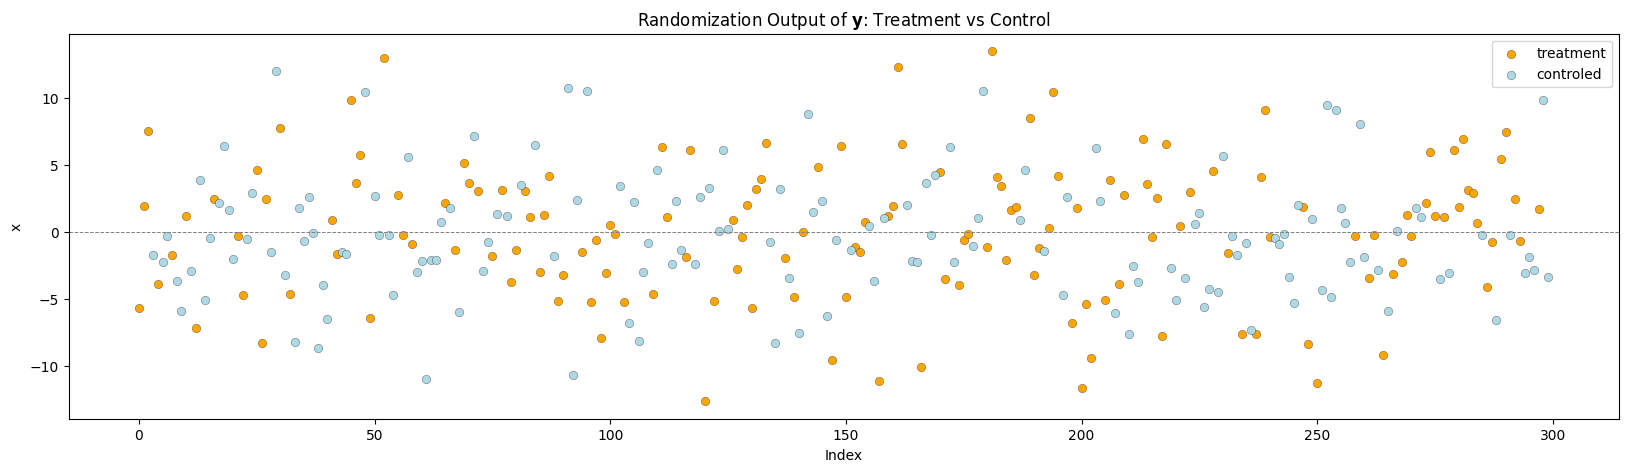

treatment_below_average    72
treatment_above_average    78
control_below_average      87
control_above_average      63
dtype: int64


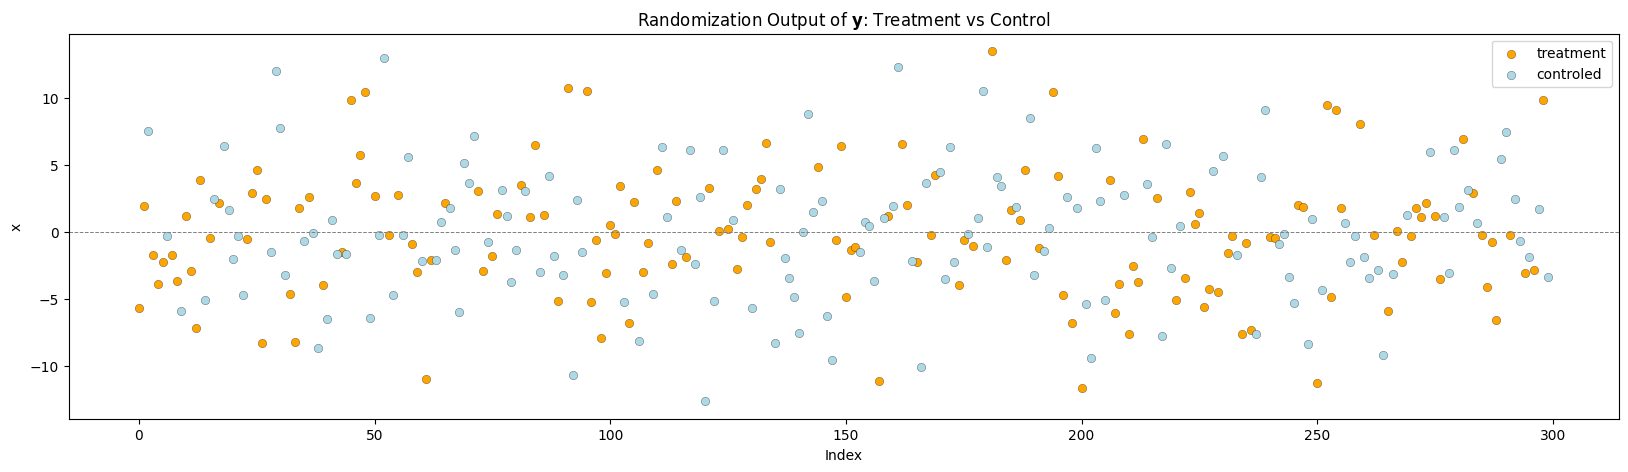

treatment_below_average    82
treatment_above_average    68
control_below_average      77
control_above_average      73
dtype: int64


In [5]:
# Output the current random seed
# seed = np.random.get_state()
# print('The current random seed is:', seed[1][0])

# np.random.seed(2107588339)

Ws_equal_size = Ws_generator_equal_size(Xs)
df_equal_size = Ys_generator(Xs, Ws_equal_size)
Xs_randomization_output_plot(df_equal_size)

number_below_above_average(Xs, Ws_equal_size)

Pa = 0.1
a = choice_of_threshold(colNum, Pa)
Ws_rerandomization = Ws_generator_rerandomization(Xs, a)
df_rerandomization = Ys_generator(Xs, Ws_rerandomization)
Xs_randomization_output_plot(df_rerandomization)

number_below_above_average(Xs, Ws_rerandomization)


## tau 不同方法的比较
1. boxplot 
2. 绘制表格展示$\hat{tau}$的均值和方差

In [7]:
## initializing

tau = 3.0

np.random.seed(99)

rowNum, colNum = (5000, 5)

Xs = Xs_generator(rowNum, colNum, sigma_value=25)
Xs_average = Xs['x0'].mean()
# Xs = np.random.normal(0, 4, n)
Ws_1 = np.ones(rowNum) 
Ws_0 = np.zeros(rowNum)

Ys_1 = Ys_generator(Xs, Ws_1, tau)
Ys_0 = Ys_generator(Xs, Ws_0, tau)

# # If we use the same eps, tau will be the constant 1.0 

print("The average treatment effect tau: {0:.3f}".format(np.average(Ys_1['y']) - np.average(Ys_0['y'])))

The average treatment effect tau: 3.255


In [8]:
tau_hats = []
iterNum = 10000

## 完全随机分组

for i in range(iterNum):
    Ws = Ws_generator_equal_size(Xs)
    df = Ys_generator(Xs, Ws, tau=tau)
    tau_hats.append(tau_hat_calculator(df))
    # print("The estimated average treatment effect tau_hat {0:.3f} with Ws {1}.".format(tau_hat, Ws))


In [9]:
## 重随机化随机分组
tau_hats_rerandomization = []
## 需要及时更改threshold a
Pa = 0.5
a = choice_of_threshold(colNum, Pa)

for i in range(iterNum):
    Ws = Ws_generator_rerandomization(Xs, a, ifPrint=False)
    df = Ys_generator(Xs, Ws, tau=tau)
    tau_hats_rerandomization.append(tau_hat_calculator(df))

In [10]:
## AAtest 随机分组
tau_hats_AAtest = []
for i in range(iterNum):
    Ws = Ws_generator_AAtest(Xs, alpha=0.05, ifPrint=False)
    df = Ys_generator(Xs, Ws, tau=tau)
    tau_hats_AAtest.append(tau_hat_calculator(df))


In [11]:
## block 随机分组
tau_hats_block = []
for i in range(iterNum):
    Ws = Ws_generator_block(Xs)
    # print(Ws)
    df = Ys_generator(Xs, Ws, tau=tau)
    tau_hats_block.append(tau_hat_calculator(df))


In [12]:
##分层随机化

tau_hats_stratified = []

size = 3
random_cols = np.random.choice(Xs.columns, size=size, replace=False)
clarify_crition = {col: df[col].mean() for col in random_cols}
# clarify_crition
for i in range(iterNum):
    Ws = Ws_generator_stratified(Xs, clarify_crition)
    df = Ys_generator(Xs, Ws, tau=tau)
    tau_hats_stratified.append(tau_hat_calculator(df))

C:\Users\19514\AppData\Local\Temp\ipykernel_18092\3339713940.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold')


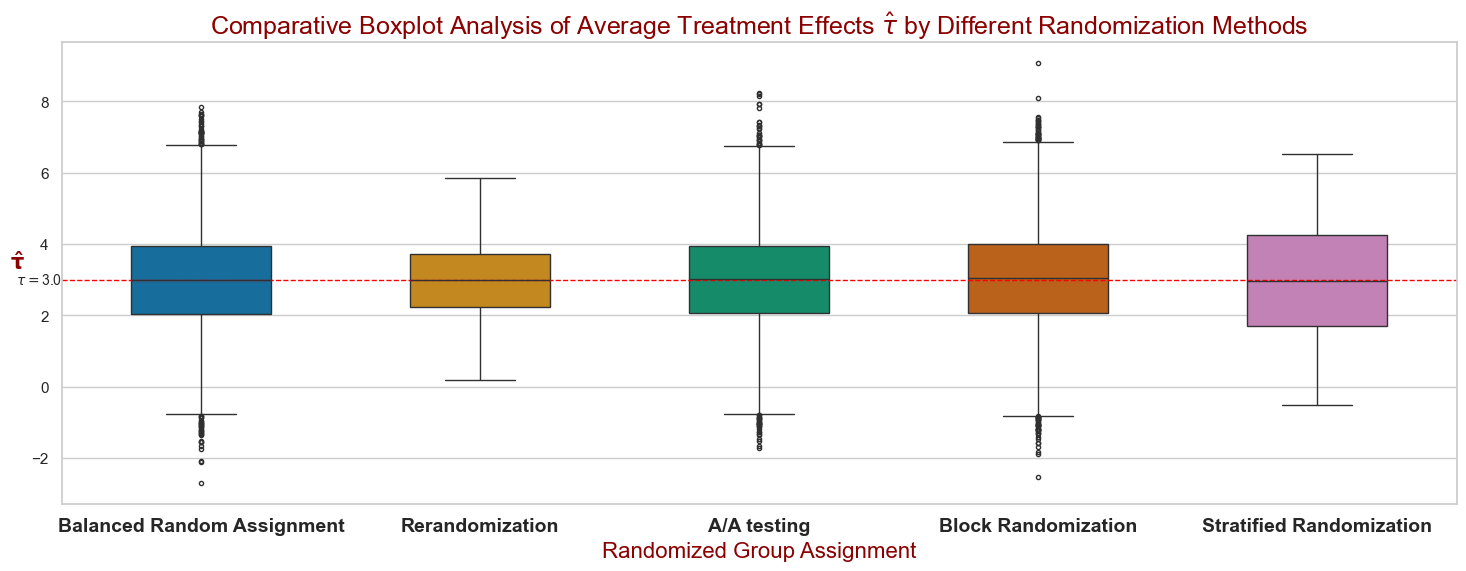

In [13]:
import seaborn as sns

data = pd.DataFrame({
    'Balanced Random Assignment': tau_hats,
    'Rerandomization': tau_hats_rerandomization,
    'A/A testing': tau_hats_AAtest,
    'Block Randomization': tau_hats_block,
    'Stratified Randomization': tau_hats_stratified
})

# 使用seaborn绘制箱线图
sns.set_theme(style='whitegrid') # 设置背景风格
plt.figure(figsize=(18, 6)) # 设置图形大小

# 绘制箱线图
ax = sns.boxplot(data=data, width=0.5, palette="colorblind", fliersize=3)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold')


# texts = ['Balanced Random Assignment', 'Rerandomization', 'A/A test', 'Block randomization', 'Stratified Randomization']
# for tick, text in zip(range(len(texts)), texts):
#     plt.text(tick, 0, text, 
#              horizontalalignment='center', size=15, color='black', weight='semibold')

# 设置图表标题和坐标轴标签
plt.title(r"Comparative Boxplot Analysis of Average Treatment Effects $\hat\tau$ by Different Randomization Methods", fontsize=18, color='darkred')
plt.ylabel(r"$\mathbf{\hat{\tau}}$", rotation=0,labelpad=10,fontsize=15, color='darkred')
plt.xlabel("Randomized Group Assignment", fontsize=16, color='darkred')

plt.text(-0.5, tau, r'$\tau=${0}'.format(tau), fontsize=10, verticalalignment='center', horizontalalignment='right')
plt.axhline(y=tau, color='red', linestyle='--', linewidth = 1)

# 显示图形
plt.show()

In [14]:
# 导出结果的均值和方差信息

stats_df = pd.DataFrame({'mean': data.mean(), 'variance': data.var()})
stats_df
# 使用float_format参数将数值格式化为保留两位小数
latex_code = stats_df.to_latex(float_format="%.2f")

print(latex_code)

\begin{tabular}{lrr}
\toprule
 & mean & variance \\
\midrule
Balanced Random Assignment & 3.00 & 1.98 \\
Rerandomization & 2.99 & 1.06 \\
A/A testing & 3.00 & 1.91 \\
Block Randomization & 3.03 & 2.00 \\
Stratified Randomization & 2.97 & 2.56 \\
\bottomrule
\end{tabular}



## 重随机化
#### 计算时间和平均处理效应$\hat{\tau}$的方差和 接受概率$P_a$的关系

In [16]:
import time

duringTimes = []

## 重随机化随机分组
All_tau_hats_rerandomization = []
## 需要及时更改threshold a
Pas = [i/10 for i in range(1, 11)]
for Pa in Pas:

    tau_hats_rerandomization = []
    a = choice_of_threshold(colNum, Pa)

    start_time = time.time()

    for i in range(iterNum):
        Ws = Ws_generator_rerandomization(Xs, a, ifPrint=False)
        df = Ys_generator(Xs, Ws, tau=tau)
        tau_hats_rerandomization.append(tau_hat_calculator(df))
        
    end_time = time.time()
    execution_time = end_time - start_time
    duringTimes.append(execution_time)

    All_tau_hats_rerandomization.append(tau_hats_rerandomization)
    

In [17]:
data_pa = pd.DataFrame(All_tau_hats_rerandomization).transpose()
data_pa.columns = Pas
data_pa

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,2.454395,1.953478,3.033198,4.448061,2.898355,3.403737,3.549861,1.516062,3.228841,2.172256
1,4.342388,3.061848,2.885280,4.689357,3.895480,3.392091,3.525760,3.731873,1.973242,5.984283
2,3.360581,3.243412,2.564683,1.511654,2.621355,1.147959,3.179896,2.741041,4.175757,3.744205
3,3.818063,2.139879,1.518526,2.957579,2.014226,3.884381,4.445292,2.756248,4.997724,4.288522
4,4.077826,1.743729,3.321448,3.468084,2.192116,4.324663,4.541732,5.260387,2.624194,2.564634
...,...,...,...,...,...,...,...,...,...,...
9995,3.236161,3.558424,2.958834,3.754136,1.817612,4.238555,0.602054,4.005763,6.072466,0.849443
9996,2.684862,3.460391,2.621038,2.019803,3.127938,4.936313,2.745306,3.448185,3.311484,3.335944
9997,2.895210,3.051854,2.767400,4.935047,2.975997,1.815874,2.955048,3.054667,2.788018,1.453809
9998,1.993709,3.091651,4.017638,2.861926,3.359864,2.616200,2.969517,2.342543,1.706199,3.268057


In [18]:
## 导出latex代码

stats_df = pd.DataFrame({'mean': data_pa.mean(), 'variance': data_pa.var()})
stats_df.index = Pas
# 使用float_format参数将数值格式化为保留两位小数
latex_code = stats_df.to_latex(float_format="%.2f")

print(latex_code)

\begin{tabular}{lrr}
\toprule
 & mean & variance \\
\midrule
0.100000 & 2.98 & 0.44 \\
0.200000 & 3.00 & 0.64 \\
0.300000 & 3.00 & 0.76 \\
0.400000 & 3.00 & 0.93 \\
0.500000 & 2.99 & 1.04 \\
0.600000 & 3.01 & 1.20 \\
0.700000 & 3.01 & 1.32 \\
0.800000 & 2.99 & 1.49 \\
0.900000 & 2.95 & 1.72 \\
1.000000 & 3.00 & 2.02 \\
\bottomrule
\end{tabular}



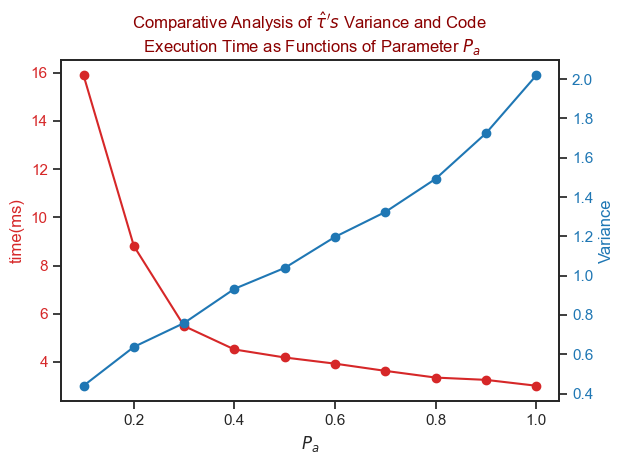

In [19]:

from matplotlib.pyplot import MultipleLocator

# 创建数据
data = pd.DataFrame({
    'x': Pas,
    'y1': np.array(duringTimes)/iterNum*1000,
    'y2': data_pa.var()
})

sns.set_theme(style='ticks')
fig, ax1 = plt.subplots()

plt.title(r"Comparative Analysis of $\hat{\tau}'s$ Variance and Code "+"\n Execution Time as Functions of Parameter "+r"$P_a$", color='darkred')

color = 'tab:red'
ax1.set_xlabel(r'$P_a$')
ax1.set_ylabel("time(ms)", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(data['x'], data['y1'], color=color, marker = 'o')

ax1.xaxis.set_major_locator(MultipleLocator(0.2))
ax2 = ax1.twinx()  # 创建共用x轴的第二个y轴

color = 'tab:blue'
ax2.set_ylabel('Variance', color=color)
ax2.plot(data['x'], data['y2'], color=color, marker = 'o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

C:\Users\19514\AppData\Local\Temp\ipykernel_18092\2403561634.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold')


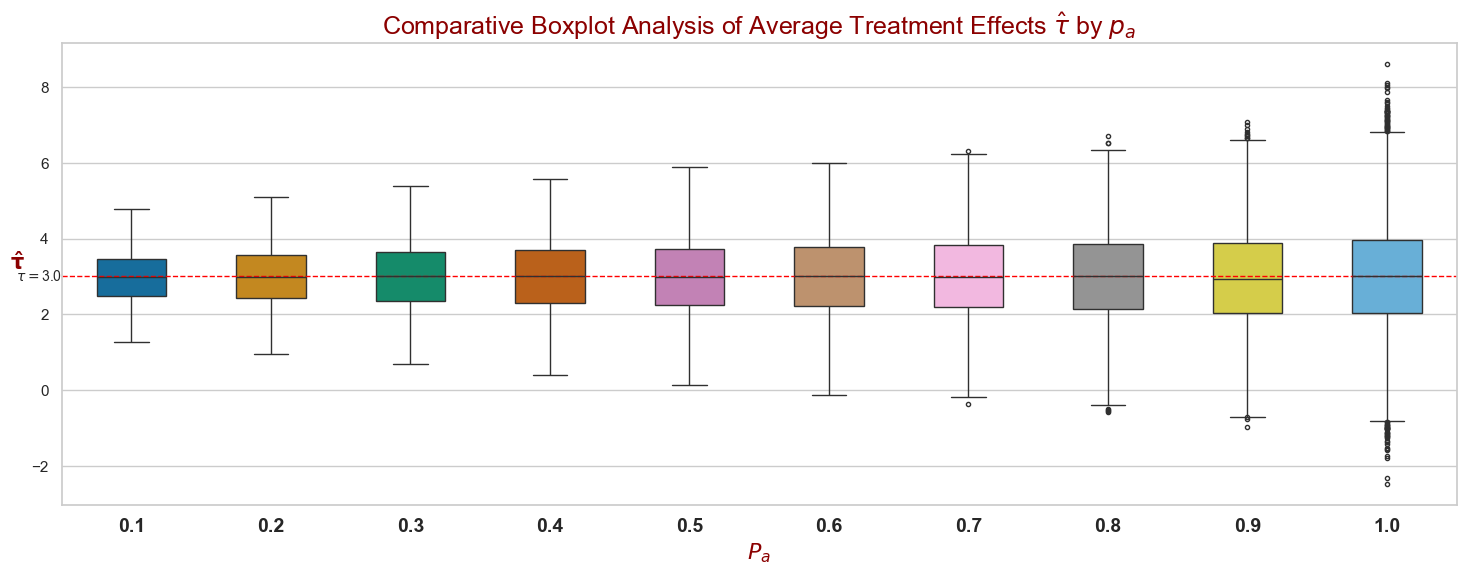

In [20]:


# 使用seaborn绘制箱线图
sns.set_theme(style='whitegrid') # 设置背景风格
plt.figure(figsize=(18, 6)) # 设置图形大小

# 绘制箱线图
ax = sns.boxplot(data=data_pa, width=0.5, palette="colorblind", fliersize=3)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold')


# texts = ['Balanced Random Assignment', 'Rerandomization', 'A/A test', 'Block randomization', 'Stratified Randomization']
# for tick, text in zip(range(len(texts)), texts):
#     plt.text(tick, 0, text, 
#              horizontalalignment='center', size=15, color='black', weight='semibold')

# 设置图表标题和坐标轴标签
plt.title(r"Comparative Boxplot Analysis of Average Treatment Effects $\hat\tau$ by $p_a$", fontsize=18, color='darkred')
plt.ylabel(r"$\mathbf{\hat{\tau}}$", rotation=0,labelpad=10,fontsize=15, color='darkred')
plt.xlabel("$P_a$", fontsize=16, color='darkred')

plt.text(-0.5, tau, r'$\tau=${0}'.format(tau), fontsize=10, verticalalignment='center', horizontalalignment='right')
plt.axhline(y=tau, color='red', linestyle='--', linewidth = 1)

# 显示图形
plt.show()

## 分层随机化

#### 计算时间和平均处理效应$\hat{\tau}$的方差和 分层随机化因素个数的关系

In [21]:
##分层随机化

all_tau_hats_stratified = []
duringTimes = []

sizes = [i for i in range(1, 6)]
for size in sizes:

    tau_hats_stratified = []
    random_cols = np.random.choice(Xs.columns, size=size, replace=False)
    clarify_crition = {col: df[col].mean() for col in random_cols}
    # clarify_crition

    start_time = time.time()

    for i in range(iterNum):
        Ws = Ws_generator_stratified(Xs, clarify_crition)
        df = Ys_generator(Xs, Ws, tau=tau)
        tau_hats_stratified.append(tau_hat_calculator(df))

    end_time = time.time()
    execution_time = end_time - start_time
    print('size: {0}, execution time: {1}'.format(size, execution_time))
    duringTimes.append(execution_time)
    
    all_tau_hats_stratified.append(tau_hats_stratified)

size: 1, execution time: 239.36024069786072
size: 2, execution time: 310.9461193084717
size: 3, execution time: 372.08378291130066
size: 4, execution time: 426.38999032974243
size: 5, execution time: 492.9030566215515


In [22]:
data_size = pd.DataFrame(all_tau_hats_stratified).transpose()
data_size.columns = sizes
data_size

,1,2,3,4,5
0,4.261774,5.508886,1.781267,3.555280,3.230782
1,3.468007,1.502368,5.026749,2.660417,3.464716
2,2.859042,0.408847,5.065009,3.563196,3.849096
3,2.234091,5.671322,1.853268,3.190989,2.392005
4,1.771333,4.463152,2.182606,2.768538,2.072107
...,...,...,...,...,...
9995,4.140135,4.140279,1.325213,3.258560,2.882626
9996,3.229679,4.898586,2.685452,3.408175,2.412632
9997,2.610954,1.818422,3.423356,3.078140,3.616724
9998,3.879143,4.719740,1.971836,2.582403,1.720188


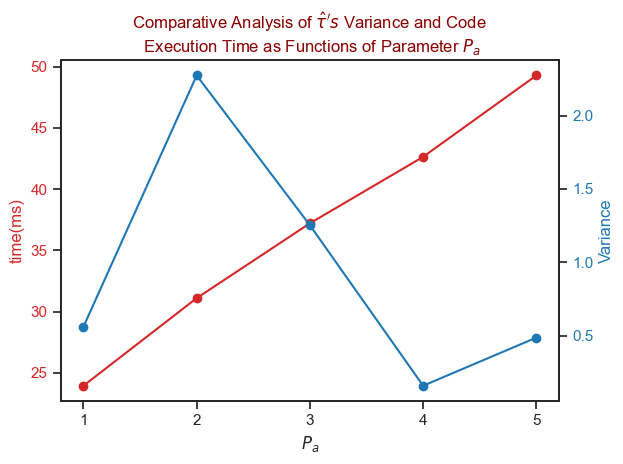

In [23]:
from matplotlib.pyplot import MultipleLocator

# 创建数据
data = pd.DataFrame({
    'x': sizes,
    'y1': np.array(duringTimes)/iterNum*1000,
    'y2': data_size.var()
})

sns.set_theme(style='ticks')
fig, ax1 = plt.subplots()

plt.title(r"Comparative Analysis of $\hat{\tau}'s$ Variance and Code "+"\n Execution Time as Functions of Parameter "+r"$P_a$", color='darkred')

color = 'tab:red'
ax1.set_xlabel(r'$P_a$')
ax1.set_ylabel("time(ms)", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(data['x'], data['y1'], color=color, marker = 'o')

ax1.xaxis.set_major_locator(MultipleLocator(1))
ax2 = ax1.twinx()  # 创建共用x轴的第二个y轴

color = 'tab:blue'
ax2.set_ylabel('Variance', color=color)
ax2.plot(data['x'], data['y2'], color=color, marker = 'o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()